In [1]:
# Problem Set #2
#
# Name : Dan Gamarnik
#
# Date : 1/21/2018
#
import os
import math
import scipy.optimize as opt
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
np.seterr(all='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

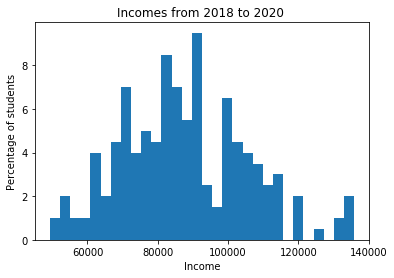

In [2]:
'''
----------------------------------------------------------------------------
Problem 1. Some income data, lognormal distribution, and hypothesis testing
----------------------------------------------------------------------------
'''
income = np.loadtxt('incomes.txt')


# 1A

# Plot histogram of MACSS Student's Income
weights = (1 / income.shape[0]) * np.ones_like(income) * 100
num_bins = 30 
plt.hist(income, num_bins, weights = weights)
plt.title('Incomes from 2018 to 2020 ', fontsize=12)
plt.xlabel('Income')
plt.ylabel('Percentage of students')
plt.show()




C:\Users\GamaD\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\GamaD\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


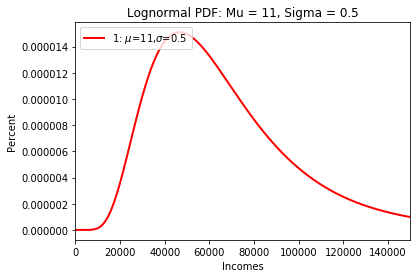

1B. The log likelihood value is -2385.85700.



In [3]:
# 1B

# Initial Values of Mu and Sigma and Bounds

sigma = 0.5
mu = 11.0
lower_bound = 0.00000000001
upper_bound = 150000
nums = upper_bound - lower_bound
x_vals = np.linspace(lower_bound, upper_bound, nums)
cutoff = upper_bound

# Define function that generates values of a log normal pdf
def lognorm_pdf(x_vals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    mu     = scalar, mean of the normally distributed random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
             
    xvals  = (N,) vector, values of the normally distributed random
             variable
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    lognorm = sts.lognorm(s = sigma, scale = np.exp(mu))
    y_vals = lognorm.pdf(x_vals)
    return y_vals

# plot the graph
x_vals = np.linspace(upper_bound, lower_bound, nums)
plt.plot(x_vals, lognorm_pdf(x_vals, mu, sigma, cutoff) ,
         linewidth=2, color='r', label='1: $\mu$=11,$\sigma$=0.5')
plt.xlim(0,150000)
plt.xlabel('Incomes')
plt.ylabel('Percent')
plt.legend(loc='upper left')
plt.title('Lognormal PDF: Mu = 11, Sigma = 0.5', fontsize=12)
plt.show()


# Define function that generates values of a log likelihood function
def log_lik_norm(x_vals, mu, sigma, cutoff):
    '''
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = lognorm_pdf(x_vals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print("1B. The log likelihood value is {:.5f}."\
    .format(log_lik_norm(income, mu, sigma, cutoff)))
print("")

1C: The MLE for mu is 11.35902. and the MLE for sigma is 0.20818.
The value of the likelihood finction is -2241.71930. 
The Varianvce-covarianve matrix is 
 [[ 0.91592473  0.08295471]
 [ 0.08295471  0.0137172 ]]



C:\Users\GamaD\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


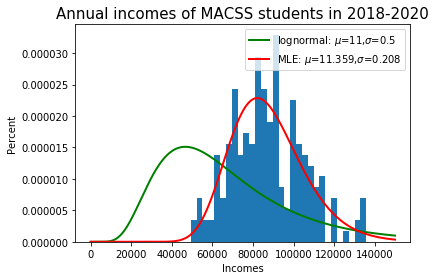

In [4]:
# 1C

def crit(params, *args):
    '''
    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    xvals  = (N,) vector, values of the normally distributed random
             variable
    args   = length 2 tuple, (xvals, cutoff)
    params = (2,) vector, ([mu, sigma])
    
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    x_vals, cutoff = args
    log_lik_val = log_lik_norm(x_vals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

# test with given initial guess
mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = (income, cutoff)
bnds = ((None, None), (0.00000000001, None))

results = opt.minimize(crit, params_init, args=(mle_args), 
            bounds = bnds, method = 'SLSQP')
mu_MLE, sig_MLE = results.x  

print('1C: The MLE for mu is {:.5f}.'.format(mu_MLE), 
    'and the MLE for sigma is {:.5f}.'.format(sig_MLE))
print('The value of the likelihood finction is {:.5f}. '\
    .format(log_lik_norm(income, mu_MLE, sig_MLE, cutoff)))


# To get the Hessian_inv, we have to guess close to MLE of mu, and sigma
mu_guess = 11
sig_guess= 0.2
params_mle = np.array([mu_guess, sig_guess])
results_mle = opt.minimize(crit, params_mle, args=(mle_args), 
                bounds = bnds, method = 'L-BFGS-B')
vcv_mle = results_mle.hess_inv.todense()

print('The Varianvce-covarianve matrix is \n', vcv_mle)
print("")

# plot all graph from 1-a, 1-b and the lognormal pdf by MLE

# Plot the histogram from (a)
weights = (1 / income.shape[0]) * np.ones_like(income) * 100
num_bins = 30
plt.hist(income, num_bins, weights = weights, normed= True)

# Plot the test distributions from (b)
x_vals = np.linspace(lower_bound, upper_bound, nums)
plt.plot(x_vals, lognorm_pdf(x_vals, mu, sigma, cutoff) ,
         linewidth=2, color='g', label='lognormal: $\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper right')

# Plot the MLE estimated distribution
plt.plot(x_vals, lognorm_pdf(x_vals, mu_MLE, sig_MLE, cutoff),
         linewidth=2, color='r', label='MLE: $\mu$=11.359,$\sigma$=0.208')
plt.legend(loc='upper right')
plt.title('Annual incomes of MACSS students in 2018-2020', fontsize=15)
plt.xlabel('Incomes')
plt.ylabel('Percent')
plt.show()



In [5]:
# 1D

# Perform a likelihood test to determine the probabability that the data
# in incomes.txt came from the distribution in part (b)
log_lik_h0 = log_lik_norm(income, mu, sigma, cutoff)
log_lik_mle = log_lik_norm(income, mu_MLE, sig_MLE, cutoff)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2) #area under the graph 

print('1-d. Chi squared of H0 with 2 degrees of freedom p-value is ', pval_h0)
print('P-value is in the rejection area so that we can conclude that the data \n in income.txt\
 is not came from the distribution in part(b).')
print("")

# 1E

# According to the part (c), estimated the probability 
lognorm_mle = sts.lognorm(s = sig_MLE, scale = np.exp(mu_MLE))
cdf_mle_100k = lognorm_mle.cdf(100000)
cdf_mle_75k = lognorm_mle.cdf(75000)

gt_than_100k = 1 - cdf_mle_100k
ls_than_75k = cdf_mle_75k

print('1-e. The probability that the student will earn more than $100,000 is \n {:.2f}%.'
    .format(gt_than_100k * 100))
print('The probability that the student will earn less than $75,000 is \n {:.2f}%.'
    .format(ls_than_75k * 100))
print("")
print("")

1-d. Chi squared of H0 with 2 degrees of freedom p-value is  0.0
P-value is in the rejection area so that we can conclude that the data 
 in income.txt is not came from the distribution in part(b).

1-e. The probability that the student will earn more than $100,000 is 
 22.99%.
The probability that the student will earn less than $75,000 is 
 26.02%.




In [6]:

# Problem 2. MLE and Linear Regression

# This code creates a dataframe for problem 2
sick = np.loadtxt('sick.txt', skiprows=1, delimiter=',')

sick_i = sick[:,0]
age_i = sick[:,1]
children_i = sick[:,2]
temp_winter_i = sick[:,3]


In [7]:
# 2A

# Initial value
mu_sick = 0

# Define function that generates values of a normal pdf
def norm_pdf(data, sigma):
    '''
    --------------------------------------------------------------------
    INPUTS:
    data = (N,) vector, values of the normally distributed random
             variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable

    Returns: pdf_vals
    --------------------------------------------------------------------
    '''
    pdf_vals = (1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp(-(data)**2 / (2 * sigma**2)))  

    return pdf_vals

# Define function that generates values of a log likelihood function for problem 2
def sick_log_lik_norm(data, sigma):
    '''

    --------------------------------------------------------------------
    INPUTS:
    data  = (N,) vector, values of the normally distributed random
             variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    
    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''   
    
    pdf_vals = norm_pdf(data, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()

    return log_lik_val

def sick_crit(params, *args):
    '''

    --------------------------------------------------------------------
    INPUTS:
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 2 tuple, (xvals, cutoff)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    params = (5,) vector, ([sigma, beta0, beta1, beta2, beta3])
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability
    
    
    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val
    
    Returns: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    sigma,b0,b1,b2,b3 = params
    sick_i,age_i,children_i,temp_winter_i = args
    data = sick_i - b0 - (b1 * age_i) - (b2 * children_i) - (b3 * temp_winter_i)

    sick_log_lik_val = sick_log_lik_norm(data, sigma)
    sick_neg_log_lik_val = - sick_log_lik_val

    return sick_neg_log_lik_val

# Initial Guess Test 
sick_sig_init, b0_init, b1_init, b2_init, b3_init = (1, 0.2, 0.3, 0.2, 0.3)
sick_params_init = np.array([sick_sig_init,b0_init,b1_init,b2_init,b3_init])
sick_bnds = ((0.00000000001, None),(None, None),(None, None), 
            (None, None), (None, None))
sick_mle_args = (sick_i, age_i, children_i, temp_winter_i) 
results = opt.minimize(sick_crit, sick_params_init, args = (sick_mle_args),
                         bounds = sick_bnds, method = 'SLSQP')
# MLE of sigma, b0, b1, b2, b3
sick_sig_MLE, b0_MLE, b1_MLE, b2_MLE, b3_MLE = results.x

# To get the Hessian_inv, we have to guess close to MLE of sigma, b0, b1, b2, b3
sick_params_mle = np.array([sick_sig_MLE, b0_MLE, b1_MLE, b2_MLE, b3_MLE])
sick_results_mle = opt.minimize(sick_crit, sick_params_mle, 
                                args=(sick_mle_args), bounds = sick_bnds,
                                method = 'L-BFGS-B')
sick_vcv_mle = sick_results_mle.hess_inv.todense()
# To generate the value of likelihood function, we need to know the data using MLE
data_MLE = sick_i - b0_MLE - (b1_MLE * age_i)- (b2_MLE * children_i) \
            - (b3_MLE * temp_winter_i)

print('2A: The MLE for sigma is {:.5f},'.format(sick_sig_MLE), 
    'the MLE for sigma squared is {:.5f},'.format(b0_MLE ** 2), \
    'the MLE for b0 is {:.5f},'.format(b0_MLE), \
    'the MLE for b1 is {:.5f}, '.format(b1_MLE), \
    'the MLE for b2 is {:.5f},'.format(b2_MLE), \
    'the MLE for b3 is{:.5f}.'.format(b3_MLE))
print('The value of the likelihood function is {:.5f}.'\
    .format(sick_log_lik_norm(data_MLE, sick_sig_MLE)))
print('The Varianvce-covarianve matrix is \n', sick_vcv_mle)
print("")

2A: The MLE for sigma is 0.00302, the MLE for sigma squared is 0.06333, the MLE for b0 is 0.25165, the MLE for b1 is 0.01293,  the MLE for b2 is 0.40050, the MLE for b3 is-0.00999.
The value of the likelihood function is 876.86505.
The Varianvce-covarianve matrix is 
 [[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]



In [8]:
# 2B

sigma = math.sqrt(0.01)
b0, b1, b2, b3 = (1, 0, 0, 0)

data_h0 = sick_i - b0 - (b1 * age_i) - (b2 * children_i) - (b3 * temp_winter_i)
data_MLE = sick_i - b0_MLE - (b1_MLE * age_i)- (b2_MLE * children_i)\
            - (b3_MLE * temp_winter_i)
sick_log_lik_h0 = sick_log_lik_norm(data_h0, sigma)
sick_log_lik_mle = sick_log_lik_norm(data_MLE, sick_sig_MLE)
sick_LR_val = 2 * (sick_log_lik_mle - sick_log_lik_h0)
sick_pval_h0 = 1.0 - sts.chi2.cdf(sick_LR_val, 2) 

print('2B. Chi squared of H0 with 2 degrees of freedom p-value is ', sick_pval_h0)
print('Because the P-value is in the rejection area we can conclude that the age,\n \
number of children, and average winter temperture have effect \n on the number of sick days.')

2B. Chi squared of H0 with 2 degrees of freedom p-value is  0.0
Because the P-value is in the rejection area we can conclude that the age,
 number of children, and average winter temperture have effect 
 on the number of sick days.
